<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
import spacy
from spacy.tokenizer import Tokenizer
import seaborn as sns
import re

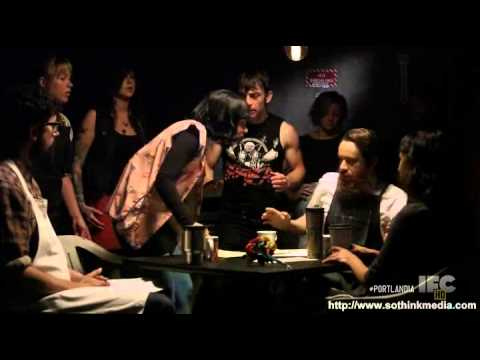

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
# make seperate dfs by rating, get word count in each rating group and then add the count to original df

In [4]:
%pwd

'C:\\Users\\Thomas\\LambdaSchool\\Unit4Sprint1\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [18]:
# Start here
nlp = spacy.load("en_core_web_lg")

## tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [45]:
#create an empty list for my tokens to go into.
tokens = []
STOP_WORDS = nlp.Defaults.stop_words

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        #checking if current token is in the stop words or if it is punctuation or a space
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
            #making sure that all the letters in each token are lowercase.
            doc_tokens.append(token.text.lower())
    #appending the token if it matches the requirements above and had .lower() applied
    tokens.append(doc_tokens)
#setting the tokens
shops['tokens'] = tokens

In [23]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11/25/2016, 1, check-in, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[12/2/2016, listed, date, night:, austin,, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11/30/2016, 1, check-in, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11/25/2016, cool, decor!, good, drinks, nice,..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[12/3/2016, 1, check-in, located, northcross, ..."


In [24]:
shops['star_rating'] = shops['star_rating'].apply(lambda x: x[1])
#for value in shops['star_rating']:
#    value = value[1]

In [25]:
shops['star_rating'].value_counts()

5    3780
4    2360
3     738
2     460
1     278
Name: star_rating, dtype: int64

In [26]:
shops['star_rating'] = shops['star_rating'].astype(int)
shops['star_rating']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating, Length: 7616, dtype: int32

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [27]:
cutoff = 3
good_shops = shops[shops['star_rating'] > cutoff]
bad_shops = shops[shops['star_rating'] <= cutoff]
print('Length of good shop reviews:', good_shops.shape[0])
print("Length of bad shop reviews:", bad_shops.shape[0])

Length of good shop reviews: 6140
Length of bad shop reviews: 1476


In [28]:
bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,"[11/25/2016, cool, decor!, good, drinks, nice,..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3,"[10/25/2016, 1, check-in, ok,, let's, try, app..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3,"[11/20/2016, store, a+, decoration,, honestly,..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3,"[11/17/2016, 1, check-in, listed, 2016, time, ..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1,"[12/2/2016, okay,, visiting, friends, la, tryi..."


In [29]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        #sorts the df by highest rank first
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
# Getting a count of the tokens
good_words = count(good_shops['tokens'])
bad_words = count(bad_shops['tokens'])
good_words.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,coffee,3383,6421,1.0,0.020690,0.020690,0.550977
107,place,2432,3389,2.0,0.010920,0.031611,0.396091
93,great,2174,2902,3.0,0.009351,0.040962,0.354072
231,it's,1647,2500,4.0,0.008056,0.049018,0.268241
291,good,1643,2180,5.0,0.007025,0.056042,0.267590
216,like,1486,2068,6.0,0.006664,0.062706,0.242020
0,1,1621,1649,7.0,0.005314,0.068020,0.264007
22,love,1263,1604,8.0,0.005169,0.073188,0.205700
24,check-in,1598,1602,9.0,0.005162,0.078351,0.260261
282,i'm,1077,1375,10.0,0.004431,0.082781,0.175407


In [41]:
print(len(bad_words['word']))
bad_words.head(10)

16325


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,coffee,827,1637,1.0,0.018596,0.018596,0.560298
98,place,597,875,2.0,0.009940,0.028535,0.404472
8,like,548,834,3.0,0.009474,0.038009,0.371274
206,it's,414,617,4.0,0.007009,0.045018,0.280488
12,good,441,599,5.0,0.006804,0.051822,0.298780
200,don't,340,430,6.0,0.004885,0.056707,0.230352
76,i'm,305,422,7.0,0.004794,0.061500,0.206640
149,1,377,386,8.0,0.004385,0.065885,0.255420
107,food,266,369,9.0,0.004192,0.070077,0.180217
95,check-in,359,359,10.0,0.004078,0.074155,0.243225


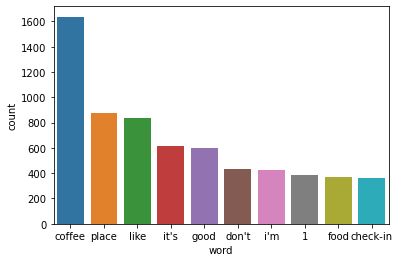

In [39]:
sns.barplot(x='word', y='count', data=bad_words[:10])

In [44]:
print(len(good_words['word']))
good_words.head(10)

34289


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,coffee,3383,6421,1.0,0.020690,0.020690,0.550977
107,place,2432,3389,2.0,0.010920,0.031611,0.396091
93,great,2174,2902,3.0,0.009351,0.040962,0.354072
231,it's,1647,2500,4.0,0.008056,0.049018,0.268241
291,good,1643,2180,5.0,0.007025,0.056042,0.267590
216,like,1486,2068,6.0,0.006664,0.062706,0.242020
0,1,1621,1649,7.0,0.005314,0.068020,0.264007
22,love,1263,1604,8.0,0.005169,0.073188,0.205700
24,check-in,1598,1602,9.0,0.005162,0.078351,0.260261
282,i'm,1077,1375,10.0,0.004431,0.082781,0.175407


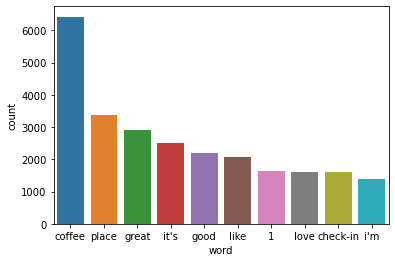

In [40]:

sns.barplot(x='word', y='count', data=good_words[:10])

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [47]:
# getting the relative frequency of each word by dividing the count of each row by the sum of the row.
good_words['rel_freq'] = good_words['count'] / good_words['count'].sum()
good_words['rel_freq']

28       0.020690
107      0.010920
93       0.009351
231      0.008056
291      0.007025
           ...   
34283    0.000003
34282    0.000003
34285    0.000003
34287    0.000003
34286    0.000003
Name: rel_freq, Length: 34289, dtype: float64

In [48]:
# getting the relative frequency of each word by dividing the count of each row by the sum of the row.
bad_words['rel_freq'] = bad_words['count'] / bad_words['count'].sum()
bad_words['rel_freq']

24       0.018596
98       0.009940
8        0.009474
206      0.007009
12       0.006804
           ...   
16318    0.000011
16311    0.000011
16314    0.000011
16323    0.000011
16324    0.000011
Name: rel_freq, Length: 16325, dtype: float64

In [53]:
#adding the rel_freq column from bad_words to the good_words df by joining on 'word'
freq_df = bad_words.merge(good_words[['rel_freq', 'word']], on='word')
freq_df.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,rel_freq_x,rel_freq_y
0,coffee,827,1637,1.0,0.018596,0.018596,0.560298,0.018596,0.020690
1,place,597,875,2.0,0.009940,0.028535,0.404472,0.009940,0.010920
2,like,548,834,3.0,0.009474,0.038009,0.371274,0.009474,0.006664
3,it's,414,617,4.0,0.007009,0.045018,0.280488,0.007009,0.008056
4,good,441,599,5.0,0.006804,0.051822,0.298780,0.006804,0.007025
5,don't,340,430,6.0,0.004885,0.056707,0.230352,0.004885,0.003110
6,i'm,305,422,7.0,0.004794,0.061500,0.206640,0.004794,0.004431
7,1,377,386,8.0,0.004385,0.065885,0.255420,0.004385,0.005314
8,food,266,369,9.0,0.004192,0.070077,0.180217,0.004192,0.003203
9,check-in,359,359,10.0,0.004078,0.074155,0.243225,0.004078,0.005162


In [54]:
freq_df['freq_diff'] = abs(freq_df['rel_freq_x'] - freq_df['rel_freq_y'])
freq_df.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,rel_freq_x,rel_freq_y,freq_diff
0,coffee,827,1637,1.0,0.018596,0.018596,0.560298,0.018596,0.020690,0.002095
1,place,597,875,2.0,0.009940,0.028535,0.404472,0.009940,0.010920,0.000981
2,like,548,834,3.0,0.009474,0.038009,0.371274,0.009474,0.006664,0.002810
3,it's,414,617,4.0,0.007009,0.045018,0.280488,0.007009,0.008056,0.001047
4,good,441,599,5.0,0.006804,0.051822,0.298780,0.006804,0.007025,0.000220
5,don't,340,430,6.0,0.004885,0.056707,0.230352,0.004885,0.003110,0.001775
6,i'm,305,422,7.0,0.004794,0.061500,0.206640,0.004794,0.004431,0.000363
7,1,377,386,8.0,0.004385,0.065885,0.255420,0.004385,0.005314,0.000929
8,food,266,369,9.0,0.004192,0.070077,0.180217,0.004192,0.003203,0.000989
9,check-in,359,359,10.0,0.004078,0.074155,0.243225,0.004078,0.005162,0.001084


In [59]:
freq_df.sort_values(by=['freq_diff'][0:6], ascending=False)[:10]

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct,rel_freq_x,rel_freq_y,freq_diff
12,great,264,348,13.0,0.003953,0.086060,0.178862,0.003953,0.009351,0.005398
29,love,171,202,30.0,0.002295,0.136076,0.115854,0.002295,0.005169,0.002874
2,like,548,834,3.0,0.009474,0.038009,0.371274,0.009474,0.006664,0.002810
174,best,64,72,175.0,0.000818,0.326234,0.043360,0.000818,0.003522,0.002704
0,coffee,827,1637,1.0,0.018596,0.018596,0.560298,0.018596,0.020690,0.002095
110,check-ins,100,100,111.0,0.001136,0.264552,0.067751,0.001136,0.002997,0.001861
32,asked,146,194,33.0,0.002204,0.142789,0.098916,0.002204,0.000393,0.001811
76,friendly,119,131,77.0,0.001488,0.220522,0.080623,0.001488,0.003267,0.001779
5,don't,340,430,6.0,0.004885,0.056707,0.230352,0.004885,0.003110,0.001775
18,didn't,222,292,19.0,0.003317,0.106972,0.150407,0.003317,0.001553,0.001764


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

